<a href="https://colab.research.google.com/github/hwankang/hoggorm/blob/master/16(wed)_11_PLS_not_rmse_r_square_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Partial Least Squares Regression (PLSR) on Sensory and Fluorescence data

This notebook illustrates how to use the **hoggorm** package to carry out partial least squares regression (PLSR) on multivariate data. Furthermore, we will learn how to visualise the results of the PLSR using the **hoggormPlot** package.

---

### Import packages and prepare data

First import **hoggorm** for analysis of the data and **hoggormPlot** for plotting of the analysis results. We'll also import **pandas** such that we can read the data into a data frame. **numpy** is needed for checking dimensions of the data.

In [5]:
!wget https://github.com/olivertomic/hoggorm
!pip install hoggorm

--2022-11-16 02:28:12--  https://github.com/olivertomic/hoggorm
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘hoggorm’

hoggorm                 [ <=>                ] 227.46K  --.-KB/s    in 0.03s   

2022-11-16 02:28:13 (7.63 MB/s) - ‘hoggorm’ saved [232923]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 47 kB 1.8 MB/s 


In [4]:
!pip install hoggormplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
import hoggorm as ho
import hoggormplot as hop
import pandas as pd
import numpy as np

In [13]:
#!wget https://github.com/olivertomic/hoggorm/tree/master/examples/data/cheese_fluorescence.txt
#file=https://github.com/olivertomic/hoggorm/tree/master/examples/data/cheese_fluorescence.txt
#!pip install -r cheese_fluorescence.txt
#examples/data/cheese_fluorescence.txt
#X_df = pd.read_csv('cheese_fluorescence.txt', index_col=0, sep='\t')
#https://raw.githubusercontent.com/olivertomic/hoggorm/master/examples/PLSR/cheese_fluorescence.txt
X_df= pd.read_csv('https://raw.githubusercontent.com/olivertomic/hoggorm/master/examples/PLSR/cheese_fluorescence.txt',index_col=0, 
              sep='\t')
X_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292
Pr 1,19222.109,19937.834,20491.777,20994.000,21427.500,21915.891,22273.834,22750.279,23215.609,23497.221,...,1338.0557,1311.9445,1275.1666,1235.7777,1204.6666,1184.944500,1140.500000,1109.888800,1099.666600,1070.500000
Pr 2,18965.945,19613.334,20157.277,20661.557,21167.334,21554.057,22031.391,22451.889,22915.334,23311.611,...,1244.5555,1217.1666,1183.9445,1156.5000,1130.0555,1084.000000,1066.500000,1039.944500,1018.500000,992.083313
Pr 3,19698.221,20438.279,21124.721,21740.666,22200.445,22709.725,23222.111,23646.225,24047.389,24519.111,...,1409.5000,1366.9445,1319.8888,1289.7778,1258.2223,1235.166600,1200.611000,1173.277800,1126.555700,1097.250000
Pr 4,20037.334,20841.779,21510.889,22096.443,22605.889,23077.834,23547.725,23974.445,24490.889,24896.945,...,1374.5000,1332.3334,1287.5000,1252.9445,1228.8334,1195.944300,1159.166600,1153.611200,1117.222300,1088.333400
Pr 5,19874.889,20561.834,21248.500,21780.889,22328.834,22812.057,23266.111,23723.334,24171.221,24601.943,...,1329.0000,1291.9445,1256.7778,1226.6110,1209.7777,1169.888800,1144.555500,1123.333400,1084.888800,1081.500000
Pr 6,19529.391,20157.834,20847.500,21308.111,21716.443,22165.775,22583.166,22993.779,23520.779,24015.221,...,1737.3888,1696.5000,1635.5000,1580.3334,1556.8334,1501.222200,1463.555500,1419.277800,1365.388800,1343.416600
Pr 7,18795.582,19485.582,20139.584,20644.668,21013.668,21480.668,21873.666,22302.418,22662.500,23097.000,...,1323.3333,1286.9167,1261.0000,1235.0833,1190.0833,1174.666700,1129.166700,1095.416600,1070.416600,1049.500000
Pr 8,20052.943,20839.445,21569.221,22150.221,22662.389,23160.389,23589.943,24117.500,24484.334,24971.666,...,1140.2778,1113.1112,1075.8334,1055.7778,1037.1112,1025.777800,986.277832,969.388855,944.944397,936.083313
Pr 9,19001.391,19709.943,20368.443,20939.111,21383.111,21879.111,22335.221,22758.834,23213.443,23688.891,...,1119.1666,1076.7777,1045.3888,1033.1112,1021.3333,994.222229,962.111084,943.000000,920.166687,899.083313
Pr 10,20602.834,21406.389,22144.611,22775.000,23407.443,23940.609,24486.111,24976.275,25480.779,25966.279,...,1248.2777,1226.7778,1195.0000,1169.5000,1135.9445,1120.888800,1069.555500,1062.833400,1034.722200,1016.750000


Next, load the data that we are going to analyse using **hoggorm**. After the data has been loaded into the pandas data frame, we'll display it in the notebook.

In [ ]:
# Load fluorescence data
X_df = pd.read_csv('cheese_fluorescence.txt', index_col=0, sep='\t')
X_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292
Pr 1,19222.109,19937.834,20491.777,20994.000,21427.500,21915.891,22273.834,22750.279,23215.609,23497.221,...,1338.0557,1311.9445,1275.1666,1235.7777,1204.6666,1184.944500,1140.500000,1109.888800,1099.666600,1070.500000
Pr 2,18965.945,19613.334,20157.277,20661.557,21167.334,21554.057,22031.391,22451.889,22915.334,23311.611,...,1244.5555,1217.1666,1183.9445,1156.5000,1130.0555,1084.000000,1066.500000,1039.944500,1018.500000,992.083313
Pr 3,19698.221,20438.279,21124.721,21740.666,22200.445,22709.725,23222.111,23646.225,24047.389,24519.111,...,1409.5000,1366.9445,1319.8888,1289.7778,1258.2223,1235.166600,1200.611000,1173.277800,1126.555700,1097.250000
Pr 4,20037.334,20841.779,21510.889,22096.443,22605.889,23077.834,23547.725,23974.445,24490.889,24896.945,...,1374.5000,1332.3334,1287.5000,1252.9445,1228.8334,1195.944300,1159.166600,1153.611200,1117.222300,1088.333400
Pr 5,19874.889,20561.834,21248.500,21780.889,22328.834,22812.057,23266.111,23723.334,24171.221,24601.943,...,1329.0000,1291.9445,1256.7778,1226.6110,1209.7777,1169.888800,1144.555500,1123.333400,1084.888800,1081.500000
Pr 6,19529.391,20157.834,20847.500,21308.111,21716.443,22165.775,22583.166,22993.779,23520.779,24015.221,...,1737.3888,1696.5000,1635.5000,1580.3334,1556.8334,1501.222200,1463.555500,1419.277800,1365.388800,1343.416600
Pr 7,18795.582,19485.582,20139.584,20644.668,21013.668,21480.668,21873.666,22302.418,22662.500,23097.000,...,1323.3333,1286.9167,1261.0000,1235.0833,1190.0833,1174.666700,1129.166700,1095.416600,1070.416600,1049.500000
Pr 8,20052.943,20839.445,21569.221,22150.221,22662.389,23160.389,23589.943,24117.500,24484.334,24971.666,...,1140.2778,1113.1112,1075.8334,1055.7778,1037.1112,1025.777800,986.277832,969.388855,944.944397,936.083313
Pr 9,19001.391,19709.943,20368.443,20939.111,21383.111,21879.111,22335.221,22758.834,23213.443,23688.891,...,1119.1666,1076.7777,1045.3888,1033.1112,1021.3333,994.222229,962.111084,943.000000,920.166687,899.083313
Pr 10,20602.834,21406.389,22144.611,22775.000,23407.443,23940.609,24486.111,24976.275,25480.779,25966.279,...,1248.2777,1226.7778,1195.0000,1169.5000,1135.9445,1120.888800,1069.555500,1062.833400,1034.722200,1016.750000


In [14]:
# Load sensory data
#Y_df = pd.read_csv('cheese_sensory.txt', index_col=0, sep='\t')
Y_df = pd.read_csv('https://raw.githubusercontent.com/hwankang/hoggorm/master/examples/data/cheese_sensory.txt', index_col=0, sep='\t')
#https://raw.githubusercontent.com/hwankang/hoggorm/master/examples/data/cheese_sensory.txt
Y_df

,3.33,3.43,2.14,1.29,3.11,6.7,3.22,2.66,5.1,4.57,3.34,2.93,1.89,1.23,3.15,4.07
6.19,,,,,,,,,,,,,,,,
6.55,2.50,4.32,2.52,1.24,3.91,6.68,2.57,2.42,4.87,4.75,4.13,3.09,2.29,1.51,3.93,4.07
6.23,3.43,3.42,2.03,1.28,2.93,6.61,3.39,2.56,5.00,4.73,3.44,3.08,1.81,1.37,3.19,4.16
6.14,2.93,3.96,2.13,1.08,3.12,6.51,2.98,2.50,4.66,4.68,3.92,2.93,1.99,1.19,3.13,4.29
6.70,1.97,4.72,2.43,1.13,4.60,7.01,2.07,2.32,5.29,5.19,4.52,3.14,2.47,1.34,4.67,4.03
6.19,5.28,1.59,1.07,1.00,1.13,6.42,5.18,2.82,5.02,4.49,2.05,2.54,1.18,1.18,1.29,4.11
6.17,3.45,3.32,2.04,1.47,2.69,6.39,3.81,2.76,4.58,4.32,3.22,2.72,1.81,1.33,2.52,4.26
6.90,2.58,4.24,2.58,1.70,4.19,7.11,2.06,2.47,4.58,5.09,4.44,3.25,2.62,1.73,4.87,3.98
6.70,2.53,4.53,2.32,1.22,4.16,6.91,2.42,2.41,4.52,4.96,4.49,3.37,2.47,1.64,4.54,4.01
6.35,3.14,3.64,2.17,1.17,2.57,6.50,2.77,2.66,4.76,4.64,4.06,3.11,2.21,1.46,3.35,3.93


In [25]:
X.shape, Y.shape

((14, 292), (13, 16))

The ``nipalsPLS2`` class in hoggorm accepts only **numpy** arrays with numerical values and not pandas data frames. Therefore, the pandas data frames holding the imported data need to be "taken apart" into three parts: 
* two numpy array holding the numeric values
* two Python list holding variable (column) names
* two Python list holding object (row) names. 

The numpy arrays with values will be used as input for the ``nipalsPLS2`` class for analysis. The Python lists holding the variable and row names will be used later in the plotting function from the **hoggormPlot** package when visualising the results of the analysis. Below is the code needed to access both data, variable names and object names.

In [17]:
# Get the values from the data frame
X = X_df.values
Y = Y_df.values

# Get the variable or columns names
X_varNames = list(X_df.columns)
Y_varNames = list(Y_df.columns)

# Get the object or row names
X_objNames = list(X_df.index)
Y_objNames = list(Y_df.index)

In [32]:
X[0:13,0:2]

array([[19222.109, 19937.834],
       [18965.945, 19613.334],
       [19698.221, 20438.279],
       [20037.334, 20841.779],
       [19874.889, 20561.834],
       [19529.391, 20157.834],
       [18795.582, 19485.582],
       [20052.943, 20839.445],
       [19001.391, 19709.943],
       [20602.834, 21406.389],
       [20116.443, 20880.611],
       [20282.721, 21016.5  ],
       [19508.   , 20124.445]])

---

### Apply PLSR to our data

Now, let's run PLSR on the data using the ``nipalsPLS2`` class. The documentation provides a [description of the input parameters](https://hoggorm.readthedocs.io/en/latest/plsr.html). Using input paramter ``arrX`` and ``arrY`` we define which numpy array we would like to analyse. ``arrY`` is what typically is considered to be the response matrix, while the measurements are typically defined as ``arrX``. By setting input parameter ``Xstand=False`` and ``Ystand=False`` we make sure that the variables are only mean centered, not scaled to unit variance, if this is what you want. This is the default setting and actually doesn't need to expressed explicitly. Setting paramter ``cvType=["loo"]`` we make sure that we compute the PLS2 model using full cross validation. ``"loo"`` means "Leave One Out". By setting paramter ``numpComp=4`` we ask for four components to be computed.

In [33]:
model = ho.nipalsPLS2(arrX=X[0:13,::], Xstand=False, 
                      arrY=Y, Ystand=False,
                      cvType=["loo"], 
                      numComp=4)

loo


That's it, the PLS2 model has been computed. Now we would like to inspect the results by visualising them. We can do this using plotting functions of the separate [**hoggormPlot** package](https://hoggormplot.readthedocs.io/en/latest/). If we wish to plot the results for component 1 and component 2, we can do this by setting the input argument ``comp=[1, 2]``. The input argument ``plots=[1, 2, 3, 4, 6]`` lets the user define which plots are to be plotted. If this list for example contains value ``1``, the function will generate the scores plot for the model. If the list contains value ``2``, then the loadings plot will be plotted. Value ``3`` stands for correlation loadings plot and value ``4`` stands for bi-plot and ``6`` stands for explained variance plot. The hoggormPlot documentation provides a [description of input paramters](https://hoggormplot.readthedocs.io/en/latest/mainPlot.html).

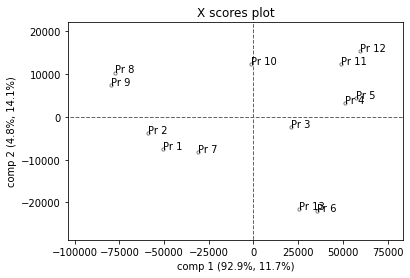

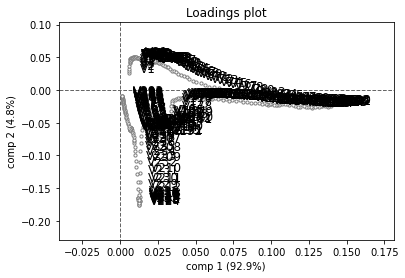

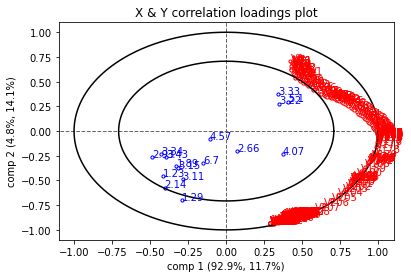

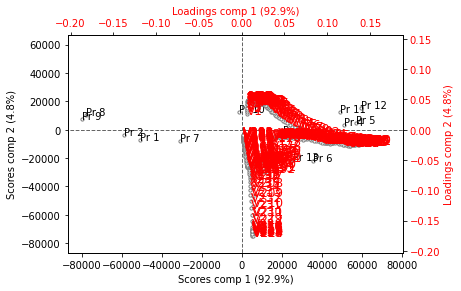

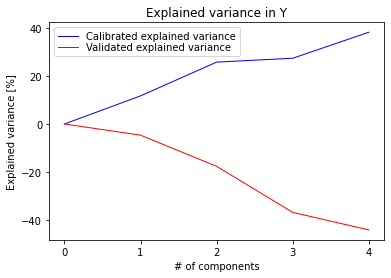

In [35]:
hop.plot(model, comp=[1, 2], 
         plots=[1, 2, 3, 4, 6], 
         objNames=X_objNames[0:13], 
         XvarNames=X_varNames,
         YvarNames=Y_varNames)

Plots can also be called separately.

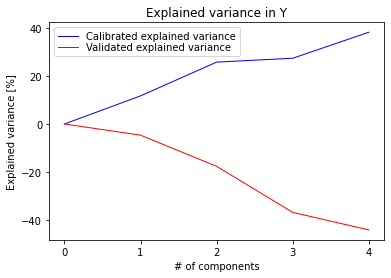

In [36]:
# Plot cumulative explained variance (both calibrated and validated) using a specific function for that.
hop.explainedVariance(model)

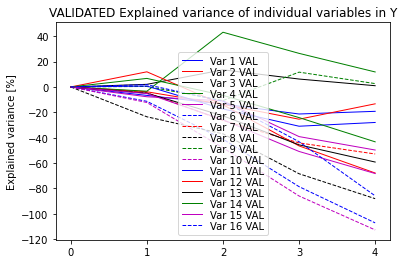

In [37]:
# Plot cumulative validated explained variance for each variable in Y
hop.explainedVariance(model, individual = True)

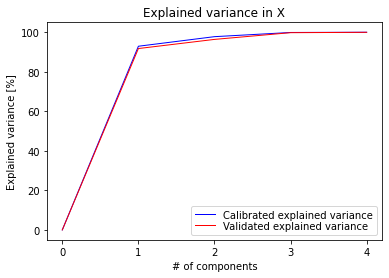

In [38]:
# Plot cumulative validated explained variance in X.
hop.explainedVariance(model, which=['X'])

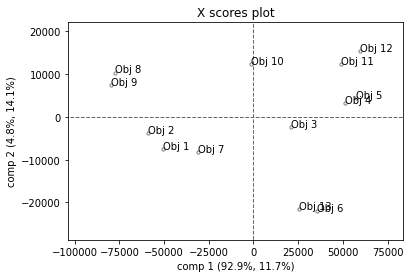

In [39]:
hop.scores(model)

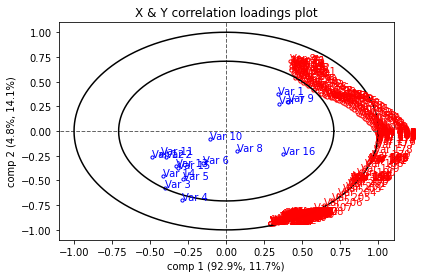

In [40]:
hop.correlationLoadings(model)

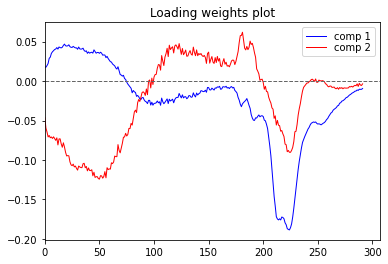

In [42]:
# Plot X loadings in line plot
hop.loadings(model, weights=True, line=True)

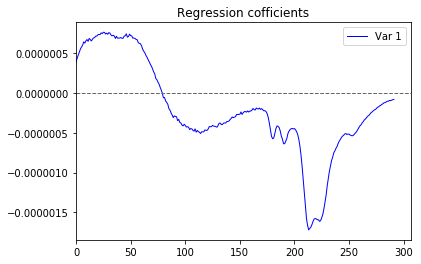

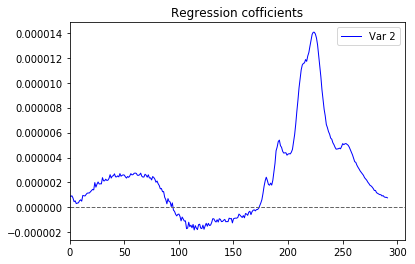

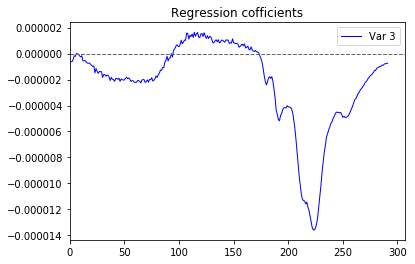

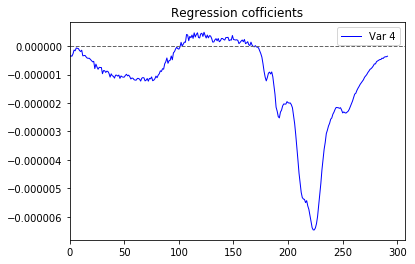

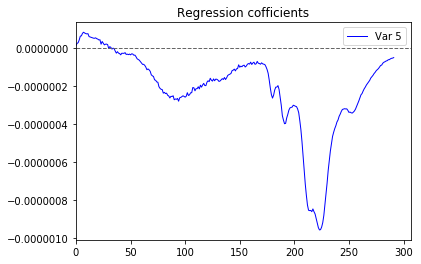

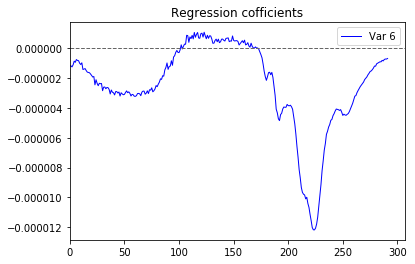

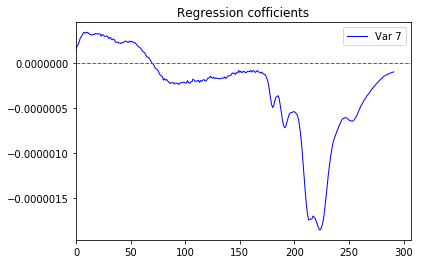

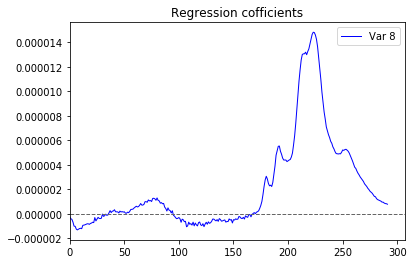

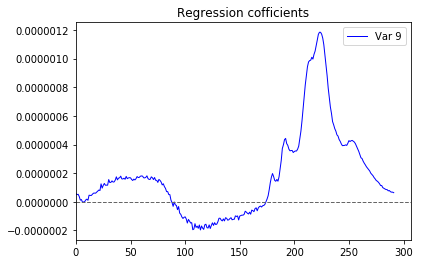

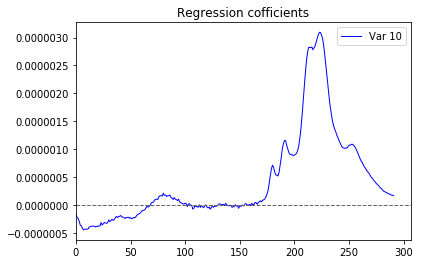

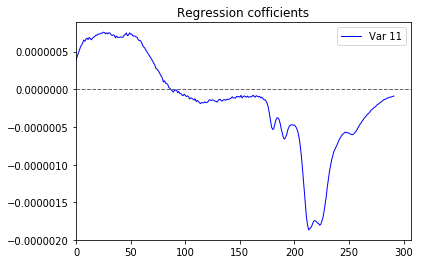

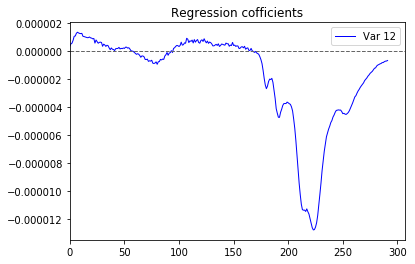

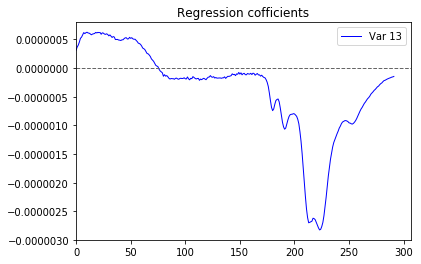

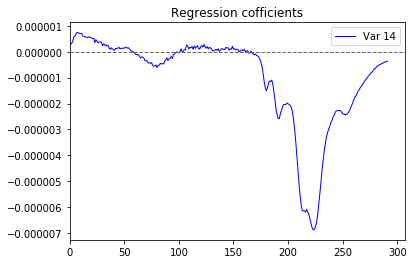

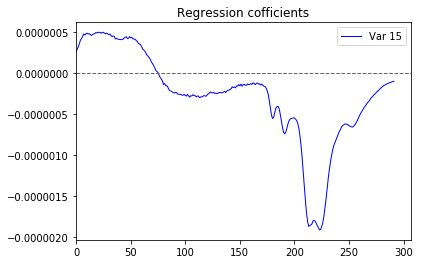

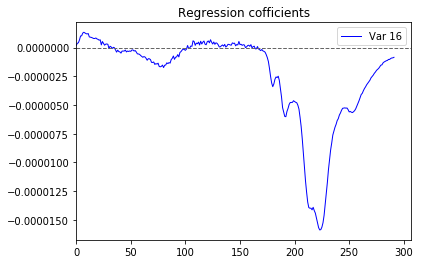

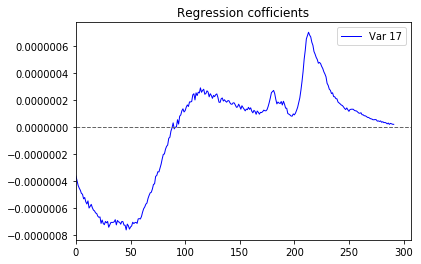

In [ ]:
# Plot regression coefficients
hop.coefficients(model, comp=[3])

---

### Accessing numerical results

Now that we have visualised the PLSR results, we may also want to access the numerical results. Below are some examples. For a complete list of accessible results, please see this part of the documentation.  

In [ ]:
# Get X scores and store in numpy array
X_scores = model.X_scores()

# Get scores and store in pandas dataframe with row and column names
X_scores_df = pd.DataFrame(model.X_scores())
X_scores_df.index = X_objNames
X_scores_df.columns = ['comp {0}'.format(x+1) for x in range(model.X_scores().shape[1])]
X_scores_df

,comp 1,comp 2,comp 3,comp 4
Pr 1,42096.177315,-8332.054500,-4932.144095,-1768.651672
Pr 2,52354.386315,-4166.271345,-8545.514083,-894.933760
Pr 3,-25557.392105,-1870.699779,1223.525296,-2023.135009
Pr 4,-52071.794492,4953.501424,-828.812265,-1431.906389
Pr 5,-57429.769857,6867.626090,-4662.155162,910.014337
Pr 6,-50838.340317,-22613.144677,7057.229911,1065.705780
Pr 7,22906.588465,-6761.703769,-12868.409777,-1895.078967
Pr 8,76468.181674,5022.172624,13425.096059,20.987653
Pr 9,77935.599156,4274.504031,659.388997,2004.141107
Pr 10,2431.321352,8922.774940,16894.579269,-1923.226591


In [ ]:
help(ho.nipalsPLS2.X_scores)

Help on function X_scores in module hoggorm.plsr2:

X_scores(self)
    Returns array holding scores of array X. First column holds scores
    for component 1, second column holds scores for component 2, etc.



In [ ]:
# Dimension of the X_scores
np.shape(model.X_scores())

(14, 4)

We see that the numpy array holds the scores for all countries and OECD (35 in total) for four components as required when computing the PCA model.

In [ ]:
# Get X loadings and store in numpy array
X_loadings = model.X_loadings()

# Get X loadings and store in pandas dataframe with row and column names
X_loadings_df = pd.DataFrame(model.X_loadings())
X_loadings_df.index = X_varNames
X_loadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_loadings_df

,comp 1,comp 2,comp 3,comp 4
V1,-0.006076,0.023875,0.044983,-0.069253
V2,-0.006019,0.027606,0.047704,-0.084228
V3,-0.006296,0.029956,0.052011,-0.086730
V4,-0.006207,0.033383,0.054553,-0.098043
V5,-0.006400,0.037639,0.058306,-0.108102
V6,-0.006491,0.039103,0.060537,-0.113490
V7,-0.006600,0.041685,0.062630,-0.120247
V8,-0.006520,0.044265,0.064066,-0.123706
V9,-0.006818,0.043221,0.066037,-0.127176
V10,-0.007000,0.044234,0.069377,-0.115173


In [ ]:
help(ho.nipalsPLS2.X_loadings)

Help on function X_loadings in module hoggorm.plsr2:

X_loadings(self)
    Returns array holding loadings of array X. Rows represent variables
    and columns represent components. First column holds loadings for
    component 1, second column holds scores for component 2, etc.



In [ ]:
np.shape(model.X_loadings())

(292, 4)

Here we see that the array holds the loadings for the 10 variables in the data across four components.

In [ ]:
# Get Y loadings and store in numpy array
Y_loadings = model.Y_loadings()

# Get Y loadings and store in pandas dataframe with row and column names
Y_loadings_df = pd.DataFrame(model.Y_loadings())
Y_loadings_df.index = Y_varNames
Y_loadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_loadings_df

,comp 1,comp 2,comp 3,comp 4
Att 01,3.659882e-06,0.000008,4.844593e-06,0.000059
Att 02,-7.929346e-06,-0.000058,2.979560e-05,-0.000036
Att 03,7.176425e-06,0.000057,-2.530711e-05,0.000022
Att 04,6.194686e-06,0.000026,-1.244405e-05,-0.000008
Att 05,2.650409e-06,0.000004,-5.773871e-07,-0.000017
Att 06,1.307698e-05,0.000046,-3.109143e-05,0.000115
Att 07,2.800073e-06,0.000009,7.881779e-07,0.000071
Att 08,-8.436781e-06,-0.000067,1.192769e-05,-0.000097
Att 09,-1.830280e-07,-0.000005,2.215633e-06,-0.000039
Att 10,-2.250660e-06,-0.000015,3.713543e-07,0.000017


In [ ]:
# Get X correlation loadings and store in numpy array
X_corrloadings = model.X_corrLoadings()

# Get X correlation loadings and store in pandas dataframe with row and column names
X_corrloadings_df = pd.DataFrame(model.X_corrLoadings())
X_corrloadings_df.index = X_varNames
X_corrloadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.X_corrLoadings().shape[1])]
X_corrloadings_df

,comp 1,comp 2,comp 3,comp 4
V1,-0.537710,0.481527,0.618814,-0.196079
V2,-0.499783,0.522404,0.615731,-0.223753
V3,-0.490218,0.531535,0.629463,-0.216036
V4,-0.459470,0.563218,0.627773,-0.232212
V5,-0.438436,0.587607,0.620853,-0.236915
V6,-0.430115,0.590534,0.623582,-0.240607
V7,-0.420651,0.605448,0.620456,-0.245179
V8,-0.402034,0.622074,0.614094,-0.244051
V9,-0.415293,0.599942,0.625223,-0.247817
V10,-0.415933,0.599007,0.640808,-0.218948


In [ ]:
help(ho.nipalsPLS2.X_corrLoadings)

Help on function X_corrLoadings in module hoggorm.plsr2:

X_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [ ]:
# Get Y loadings and store in numpy array
Y_corrloadings = model.X_corrLoadings()

# Get Y loadings and store in pandas dataframe with row and column names
Y_corrloadings_df = pd.DataFrame(model.Y_corrLoadings())
Y_corrloadings_df.index = Y_varNames
Y_corrloadings_df.columns = ['comp {0}'.format(x+1) for x in range(model.Y_corrLoadings().shape[1])]
Y_corrloadings_df

,comp 1,comp 2,comp 3,comp 4
Att 01,0.621248,0.326323,0.127830,0.319561
Att 02,-0.432678,-0.716350,0.252730,-0.062947
Att 03,0.416048,0.753942,-0.228063,0.041579
Att 04,0.601858,0.576460,-0.187937,-0.024700
Att 05,0.723269,0.227697,-0.024492,-0.148741
Att 06,0.558654,0.447880,-0.206468,0.156647
Att 07,0.518278,0.361113,0.022677,0.420714
Att 08,-0.428923,-0.780155,0.094262,-0.158445
Att 09,-0.066658,-0.425957,0.125433,-0.456422
Att 10,-0.399554,-0.591052,0.010248,0.094490


In [ ]:
help(ho.nipalsPLS2.Y_corrLoadings)

Help on function Y_corrLoadings in module hoggorm.plsr2:

Y_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column
    holds correlation loadings for component 1, second column holds
    correlation loadings for component 2, etc.



In [ ]:
# Get calibrated explained variance of each component in X
X_calExplVar = model.X_calExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
X_calExplVar_df = pd.DataFrame(model.X_calExplVar())
X_calExplVar_df.columns = ['calibrated explained variance in X']
X_calExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_calExplVar_df

,calibrated explained variance in X
comp 1,93.179950
comp 2,4.550095
comp 3,2.114119
comp 4,0.119444


In [ ]:
help(ho.nipalsPLS2.X_calExplVar)

Help on function X_calExplVar in module hoggorm.plsr2:

X_calExplVar(self)
    Returns a list holding the calibrated explained variance for
    each component. First number in list is for component 1, second number
    for component 2, etc.



In [ ]:
# Get calibrated explained variance of each component in Y
Y_calExplVar = model.Y_calExplVar()

# Get calibrated explained variance in Y and store in pandas dataframe with row and column names
Y_calExplVar_df = pd.DataFrame(model.Y_calExplVar())
Y_calExplVar_df.columns = ['calibrated explained variance in Y']
Y_calExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_calExplVar_df

,calibrated explained variance in Y
comp 1,23.876432
comp 2,43.136308
comp 3,2.596544
comp 4,3.219199


In [ ]:
help(ho.nipalsPLS2.Y_calExplVar)

Help on function Y_calExplVar in module hoggorm.plsr2:

Y_calExplVar(self)
    Returns a list holding the calibrated explained variance for each
    component. First number in list is for component 1, second number for
    component 2, etc.



In [ ]:
# Get cumulative calibrated explained variance in X
X_cumCalExplVar = model.X_cumCalExplVar()

# Get cumulative calibrated explained variance in X and store in pandas dataframe with row and column names
X_cumCalExplVar_df = pd.DataFrame(model.X_cumCalExplVar())
X_cumCalExplVar_df.columns = ['cumulative calibrated explained variance in X']
X_cumCalExplVar_df.index = ['comp {0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumCalExplVar_df

,cumulative calibrated explained variance in X
comp 0,0.000000
comp 1,93.179950
comp 2,97.730045
comp 3,99.844164
comp 4,99.963608


In [ ]:
help(ho.nipalsPLS2.X_cumCalExplVar)

Help on function X_cumCalExplVar in module hoggorm.plsr2:

X_cumCalExplVar(self)
    Returns a list holding the cumulative calibrated explained variance
    for array X after each component.



In [ ]:
# Get cumulative calibrated explained variance in Y
Y_cumCalExplVar = model.Y_cumCalExplVar()

# Get cumulative calibrated explained variance in Y and store in pandas dataframe with row and column names
Y_cumCalExplVar_df = pd.DataFrame(model.Y_cumCalExplVar())
Y_cumCalExplVar_df.columns = ['cumulative calibrated explained variance in Y']
Y_cumCalExplVar_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumCalExplVar_df

,cumulative calibrated explained variance in Y
comp 0,0.000000
comp 1,23.876432
comp 2,67.012740
comp 3,69.609284
comp 4,72.828483


In [ ]:
help(ho.nipalsPLS2.Y_cumCalExplVar)

Help on function Y_cumCalExplVar in module hoggorm.plsr2:

Y_cumCalExplVar(self)
    Returns a list holding the cumulative calibrated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [ ]:
# Get cumulative calibrated explained variance for each variable in X
X_cumCalExplVar_ind = model.X_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable in X and store in pandas dataframe with row and column names
X_cumCalExplVar_ind_df = pd.DataFrame(model.X_cumCalExplVar_indVar())
X_cumCalExplVar_ind_df.columns = X_varNames
X_cumCalExplVar_ind_df.index = ['comp {0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumCalExplVar_ind_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V283,V284,V285,V286,V287,V288,V289,V290,V291,V292
comp 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
comp 1,28.913251,24.978286,24.031362,21.111300,19.222643,18.499859,17.694748,16.163133,17.246834,17.300060,...,31.891360,31.219737,31.421252,32.671604,33.084285,32.360958,34.438913,37.257159,34.071187,37.214072
comp 2,52.100103,52.268896,52.284309,52.832747,53.750819,53.372919,54.351496,54.860786,53.239904,53.181015,...,98.299093,98.079365,98.457210,98.342591,98.294522,97.567822,98.416358,97.741342,97.772945,97.386194
comp 3,90.393177,90.181405,91.906651,92.242628,92.296706,92.258412,92.848070,92.571871,92.330304,94.244450,...,99.829861,99.691810,99.807976,99.682092,99.899160,99.595121,99.848901,99.825342,99.509441,99.416980
comp 4,94.237883,95.187966,96.573804,97.634879,97.909561,98.047580,98.859347,98.527969,98.471648,99.038259,...,99.830893,99.717402,99.869989,99.682985,99.940796,99.595131,99.859519,99.845262,99.523046,99.448810


In [ ]:
help(ho.nipalsPLS2.X_cumCalExplVar_indVar)

Help on function X_cumCalExplVar_indVar in module hoggorm.plsr2:

X_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in X after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [ ]:
# Get cumulative calibrated explained variance for each variable in Y
Y_cumCalExplVar_ind = model.Y_cumCalExplVar_indVar()

# Get cumulative calibrated explained variance for each variable in Y and store in pandas dataframe with row and column names
Y_cumCalExplVar_ind_df = pd.DataFrame(model.Y_cumCalExplVar_indVar())
Y_cumCalExplVar_ind_df.columns = Y_varNames
Y_cumCalExplVar_ind_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumCalExplVar_ind_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
comp 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
comp 1,38.594963,18.721061,17.309624,36.223261,52.311778,31.209378,26.861234,18.397484,0.444335,15.964370,6.251749,16.051894,30.396975,24.383150,45.756775,26.648990,11.379776
comp 2,49.243623,70.036815,74.152423,69.453912,57.496357,51.269002,39.901461,79.261723,18.588244,50.898648,24.895755,84.869919,63.759497,72.049129,67.431946,65.599640,31.097436
comp 3,50.877672,76.424067,79.353709,72.985958,57.556345,55.531909,39.952888,80.150251,20.161594,50.909150,26.511859,85.434179,64.149847,72.356300,68.043647,66.221952,47.939185
comp 4,61.089587,76.820304,79.526591,73.046969,59.768747,57.985732,57.652939,82.660721,40.993661,51.801990,49.904089,86.132092,69.326967,75.828119,78.407345,72.448987,61.573450


In [ ]:
help(ho.nipalsPLS2.Y_cumCalExplVar_indVar)

Help on function Y_cumCalExplVar_indVar in module hoggorm.plsr2:

Y_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in Y after each component. First row represents zero
    components, second row represents one component, third row represents
    two components, etc. Columns represent variables.



In [ ]:
# Get calibrated predicted Y for a given number of components

# Predicted Y from calibration using 1 component
Y_from_1_component = model.Y_predCal()[1]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_1_component_df = pd.DataFrame(model.Y_predCal()[1])
Y_from_1_component_df.index = Y_objNames
Y_from_1_component_df.columns = Y_varNames
Y_from_1_component_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.514067,2.827633,3.949243,2.340058,1.349429,3.608348,6.788587,2.666987,2.527295,4.750970,4.795052,3.992613,3.125293,2.263175,1.529405,3.972460,4.048871
Pr 02,6.551611,2.746293,4.022860,2.403605,1.376618,3.742494,6.817310,2.580440,2.525418,4.727882,4.808642,4.059393,3.156173,2.315818,1.560939,4.108827,4.041808
Pr 03,6.266463,3.364082,3.463732,1.920966,1.170120,2.723644,6.599152,3.237765,2.539678,4.903235,4.705429,3.552196,2.921636,1.915986,1.321436,3.073111,4.095455
Pr 04,6.169423,3.574324,3.273454,1.756717,1.099846,2.376915,6.524909,3.461461,2.544531,4.962910,4.670304,3.379590,2.841820,1.779918,1.239930,2.720644,4.113712
Pr 05,6.149814,3.616809,3.235002,1.723526,1.085645,2.306849,6.509907,3.506665,2.545511,4.974969,4.663206,3.344710,2.825691,1.752421,1.223459,2.649418,4.117401
Pr 06,6.173938,3.564543,3.282305,1.764358,1.103115,2.393045,6.528363,3.451055,2.544305,4.960134,4.671938,3.387619,2.845533,1.786248,1.243721,2.737041,4.112863
Pr 07,6.443835,2.979794,3.811530,2.221185,1.298569,3.357406,6.734854,2.828885,2.530807,4.794159,4.769631,3.867691,3.067527,2.164696,1.470416,3.717365,4.062084
Pr 08,6.639865,2.555086,4.195911,2.552982,1.440529,4.057830,6.884831,2.376998,2.521004,4.673610,4.840586,4.216371,3.228763,2.439567,1.635066,4.429383,4.025204
Pr 09,6.645235,2.543450,4.206442,2.562072,1.444418,4.077019,6.888940,2.364617,2.520736,4.670308,4.842530,4.225924,3.233180,2.447098,1.639577,4.448890,4.024193
Pr 10,6.368898,3.142150,3.664591,2.094347,1.244301,3.089651,6.677522,3.001630,2.534555,4.840242,4.742507,3.734399,3.005890,2.059620,1.407474,3.445178,4.076183


In [ ]:
# Get calibrated predicted Y for a given number of components

# Predicted Y from calibration using 4 component
Y_from_4_component = model.Y_predCal()[4]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_4_component_df = pd.DataFrame(model.Y_predCal()[4])
Y_from_4_component_df.index = Y_objNames
Y_from_4_component_df.columns = Y_varNames
Y_from_4_component_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.315815,3.224409,3.558959,2.198568,1.351904,3.175692,6.587717,3.341477,2.628408,4.841436,4.548382,3.463502,2.930491,1.912073,1.359899,3.094103,4.150253
Pr 02,6.422406,2.763936,3.981320,2.408590,1.381545,3.713958,6.711328,2.846221,2.562921,4.770685,4.658112,3.842108,3.045015,2.162145,1.461798,3.746950,4.125511
Pr 03,6.137562,3.581246,3.280667,1.873114,1.197032,2.367671,6.440367,3.575400,2.631238,4.897360,4.529908,3.346109,2.819874,1.730100,1.214353,2.518846,4.143963
Pr 04,6.122934,3.315918,3.544992,1.907372,1.142855,2.466444,6.464931,3.257524,2.573363,4.866416,4.601748,3.618318,2.852946,1.852275,1.218543,2.793189,4.132211
Pr 05,6.238707,3.049483,3.765277,1.953106,1.097977,2.872028,6.629675,2.899986,2.464291,4.888050,4.784831,3.826111,2.945832,2.040997,1.318168,3.377426,4.093774
Pr 06,6.080087,5.038997,1.837218,1.079347,0.998092,1.255509,6.416057,4.954046,2.634245,5.310835,4.560881,2.039975,2.589480,1.112651,1.098659,1.264198,4.139660
Pr 07,6.212943,3.054204,3.708865,2.220341,1.313529,3.229250,6.532191,3.315292,2.611230,4.856633,4.494210,3.488408,2.872129,1.884791,1.291561,3.028069,4.202966
Pr 08,6.748503,2.665041,4.143213,2.516503,1.450807,3.873862,6.939896,2.196921,2.524154,4.605577,4.950851,4.408884,3.328537,2.549209,1.713346,4.612314,3.932390
Pr 09,6.802417,2.244605,4.478599,2.649226,1.425543,4.482854,7.068437,1.889434,2.421755,4.641449,5.048818,4.558592,3.371601,2.700538,1.772412,5.144248,3.956426
Pr 10,6.412843,3.200893,3.703087,2.131693,1.299980,2.754420,6.630586,2.789687,2.601532,4.684169,4.751237,4.047881,3.091760,2.161534,1.440994,3.467333,3.994961


In [ ]:
help(ho.nipalsPLS2.X_predCal)

Help on function X_predCal in module hoggorm.plsr2:

X_predCal(self)
    Returns a dictionary holding the predicted arrays Xhat from
    calibration after each computed component. Dictionary key represents
    order of component.



In [ ]:
# Get validated explained variance of each component X
X_valExplVar = model.X_valExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
X_valExplVar_df = pd.DataFrame(model.X_valExplVar())
X_valExplVar_df.columns = ['validated explained variance in X']
X_valExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.X_loadings().shape[1])]
X_valExplVar_df

,validated explained variance in X
comp 1,92.247348
comp 2,4.579068
comp 3,2.909708
comp 4,0.178549


In [ ]:
help(ho.nipalsPLS2.X_valExplVar)

Help on function X_valExplVar in module hoggorm.plsr2:

X_valExplVar(self)
    Returns a list holding the validated explained variance for X after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [ ]:
# Get validated explained variance of each component Y
Y_valExplVar = model.Y_valExplVar()

# Get calibrated explained variance in X and store in pandas dataframe with row and column names
Y_valExplVar_df = pd.DataFrame(model.Y_valExplVar())
Y_valExplVar_df.columns = ['validated explained variance in Y']
Y_valExplVar_df.index = ['comp {0}'.format(x+1) for x in range(model.Y_loadings().shape[1])]
Y_valExplVar_df

,validated explained variance in Y
comp 1,10.128270
comp 2,42.920643
comp 3,-0.686366
comp 4,-1.511650


In [ ]:
help(ho.nipalsPLS2.Y_valExplVar)

Help on function Y_valExplVar in module hoggorm.plsr2:

Y_valExplVar(self)
    Returns a list holding the validated explained variance for Y after
    each component. First number in list is for component 1, second number
    for component 2, third number for component 3, etc.



In [ ]:
# Get cumulative validated explained variance in X
X_cumValExplVar = model.X_cumValExplVar()

# Get cumulative validated explained variance in X and store in pandas dataframe with row and column names
X_cumValExplVar_df = pd.DataFrame(model.X_cumValExplVar())
X_cumValExplVar_df.columns = ['cumulative validated explained variance in X']
X_cumValExplVar_df.index = ['comp {0}'.format(x) for x in range(model.X_loadings().shape[1] + 1)]
X_cumValExplVar_df

,cumulative validated explained variance in X
comp 0,0.000000
comp 1,92.247348
comp 2,96.826416
comp 3,99.736123
comp 4,99.914673


In [ ]:
help(ho.nipalsPLS2.X_cumValExplVar)

Help on function X_cumValExplVar in module hoggorm.plsr2:

X_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [ ]:
# Get cumulative validated explained variance in Y
Y_cumValExplVar = model.Y_cumValExplVar()

# Get cumulative validated explained variance in Y and store in pandas dataframe with row and column names
Y_cumValExplVar_df = pd.DataFrame(model.Y_cumValExplVar())
Y_cumValExplVar_df.columns = ['cumulative validated explained variance in Y']
Y_cumValExplVar_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumValExplVar_df

,cumulative validated explained variance in Y
comp 0,0.000000
comp 1,10.128270
comp 2,53.048913
comp 3,52.362547
comp 4,50.850897


In [ ]:
help(ho.nipalsPLS2.Y_cumValExplVar)

Help on function Y_cumValExplVar in module hoggorm.plsr2:

Y_cumValExplVar(self)
    Returns a list holding the cumulative validated explained variance
    for array X after each component. First number represents zero
    components, second number represents component 1, etc.



In [ ]:
# Get cumulative validated explained variance for each variable in Y
Y_cumCalExplVar_ind = model.Y_cumCalExplVar_indVar()

# Get cumulative validated explained variance for each variable in Y and store in pandas dataframe with row and column names
Y_cumValExplVar_ind_df = pd.DataFrame(model.Y_cumValExplVar_indVar())
Y_cumValExplVar_ind_df.columns = Y_varNames
Y_cumValExplVar_ind_df.index = ['comp {0}'.format(x) for x in range(model.Y_loadings().shape[1] + 1)]
Y_cumValExplVar_ind_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
comp 0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
comp 1,26.063912,3.735240,1.954590,23.942216,37.128878,18.133977,13.105369,4.277033,-15.059594,2.808737,-10.465638,1.933798,19.132907,11.001939,36.512325,13.568345,1.735001
comp 2,26.711695,55.409120,61.239464,55.038052,41.744052,32.045191,19.705124,70.184245,-29.739042,30.890628,-2.521240,77.752887,50.231942,58.672830,53.199876,52.296777,8.673709
comp 3,17.664735,63.533711,67.763560,58.925371,13.767897,31.629587,-4.307274,69.477680,-61.483908,13.356537,-24.226410,77.771804,45.677248,56.585739,49.471117,47.157158,23.103496
comp 4,21.770359,59.460734,65.417849,56.625847,2.389128,28.668149,10.233828,66.591370,-45.046095,-3.260476,2.534095,76.258255,45.002488,55.277380,50.445173,47.794162,25.156211


In [ ]:
help(ho.nipalsPLS2.X_cumValExplVar_indVar)

Help on function X_cumValExplVar_indVar in module hoggorm.plsr2:

X_cumValExplVar_indVar(self)
    Returns an array holding the cumulative validated explained variance
    for each variable in X after each component. First row represents
    zero components, second row represents component 1, third row for
    compnent 2, etc. Columns represent variables.



In [ ]:
# Get validated predicted Y for a given number of components

# Predicted Y from validation using 1 component
Y_from_1_component_val = model.Y_predVal()[1]

# Predicted Y from calibration using 1 component stored in pandas data frame with row and columns names
Y_from_1_component_val_df = pd.DataFrame(model.Y_predVal()[1])
Y_from_1_component_val_df.index = Y_objNames
Y_from_1_component_val_df.columns = Y_varNames
Y_from_1_component_val_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.559142,2.758462,4.020667,2.367871,1.357871,3.677818,6.800955,2.591043,2.509012,4.702723,4.826112,4.082328,3.152336,2.314684,1.570987,4.086190,4.045984
Pr 02,6.551657,2.785819,3.974854,2.383875,1.399723,3.713210,6.841135,2.577558,2.543197,4.702322,4.819669,4.051675,3.168256,2.322087,1.569801,4.143051,4.036544
Pr 03,6.270037,3.357794,3.467829,1.910105,1.159261,2.703115,6.598054,3.222997,2.537690,4.893740,4.702965,3.563037,2.905949,1.926330,1.316610,3.061311,4.089098
Pr 04,6.174534,3.686368,3.154079,1.691850,1.103297,2.247809,6.527490,3.545245,2.552281,5.015536,4.668599,3.285591,2.826486,1.743364,1.248590,2.649404,4.083111
Pr 05,6.040071,3.935792,2.948451,1.585434,1.076176,1.853857,6.410701,3.782245,2.589331,4.910275,4.559762,3.120344,2.764486,1.613765,1.200583,2.255668,4.134388
Pr 06,6.180794,3.256730,3.584452,1.896045,1.126346,2.636443,6.553649,3.138730,2.498219,4.942465,4.706065,3.630678,2.904230,1.902090,1.262502,3.014957,4.111246
Pr 07,6.471230,2.932743,3.860222,2.240662,1.283400,3.425902,6.768649,2.733561,2.509067,4.813889,4.812616,3.930633,3.101507,2.199899,1.484871,3.835381,4.043145
Pr 08,6.559727,2.530554,4.199034,2.550461,1.360592,4.027321,6.816582,2.456931,2.534830,4.699125,4.765869,4.163181,3.224237,2.391259,1.606511,4.309453,4.039027
Pr 09,6.630999,2.527909,4.121597,2.649808,1.518606,4.068021,6.885421,2.324124,2.554839,4.713741,4.807921,4.160437,3.193997,2.450585,1.642998,4.444376,4.027481
Pr 10,6.370449,3.142114,3.666670,2.088669,1.250098,3.130057,6.691284,3.019278,2.524876,4.846373,4.750446,3.709456,2.997938,2.048154,1.403501,3.452856,4.087439


In [ ]:
# Get validated predicted Y for a given number of components

# Predicted Y from validation using 3 components
Y_from_3_component_val = model.Y_predVal()[3]

# Predicted Y from calibration using 3 components stored in pandas data frame with row and columns names
Y_from_3_component_val_df = pd.DataFrame(model.Y_predVal()[3])
Y_from_3_component_val_df.index = Y_objNames
Y_from_3_component_val_df.columns = Y_varNames
Y_from_3_component_val_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
Pr 01,6.473384,3.118292,3.640642,2.196220,1.329248,3.443369,6.717030,3.153920,2.535498,4.817402,4.718330,3.587307,3.015841,2.050578,1.489885,3.522402,4.117348
Pr 02,6.452808,2.807982,3.897152,2.362201,1.406224,3.786075,6.806919,2.818607,2.561693,4.759012,4.725523,3.800025,3.077626,2.193576,1.501726,3.928848,4.114434
Pr 03,6.259752,3.518559,3.314498,1.838322,1.150432,2.563047,6.581466,3.377868,2.551368,4.923831,4.688332,3.430704,2.879885,1.856743,1.300533,2.896927,4.089292
Pr 04,6.220633,3.334599,3.497955,1.848232,1.125605,2.530736,6.577589,3.148358,2.520944,4.935285,4.723884,3.629535,2.904272,1.927656,1.302255,3.067627,4.060895
Pr 05,6.044320,3.394163,3.471099,1.829429,1.109229,2.258650,6.442196,3.246048,2.550562,4.759749,4.580500,3.582901,2.847238,1.850533,1.258444,2.783312,4.138117
Pr 06,5.855768,4.879147,2.030640,1.112938,1.033728,1.142248,6.263091,4.939886,2.547055,5.538073,4.456462,1.953605,2.554781,0.929386,0.928669,0.830298,4.217107
Pr 07,6.392796,2.777000,3.945659,2.280255,1.198921,3.782821,6.788856,2.827330,2.438856,5.022045,4.789563,3.726620,3.045701,2.085250,1.400066,3.804317,4.113612
Pr 08,6.613186,2.741821,4.057588,2.462565,1.239741,3.591742,6.787626,2.324002,2.574187,4.625772,4.824021,4.377314,3.391434,2.482451,1.694643,4.371819,3.894064
Pr 09,6.678502,2.243409,4.401978,2.782579,1.540865,4.285989,6.931080,1.971535,2.530835,4.638184,4.863300,4.467469,3.267419,2.615804,1.694077,4.809280,4.002051
Pr 10,6.669033,3.095457,3.848671,2.080442,1.335849,3.327511,6.985888,2.443274,2.412949,4.686075,5.121650,4.196052,3.215615,2.346649,1.591336,4.292039,3.962089


In [ ]:
help(ho.nipalsPLS2.Y_predVal)

Help on function Y_predVal in module hoggorm.plsr2:

Y_predVal(self)
    Returns dictionary holding arrays of predicted Yhat after each
    component from validation. Dictionary key represents order of
    component.



In [ ]:
# Get predicted scores for new measurements (objects) of X

# First pretend that we acquired new X data by using part of the existing data and overlaying some noise
import numpy.random as npr
new_X = X[0:4, :] + npr.rand(4, np.shape(X)[1])
np.shape(X)

# Now insert the new data into the existing model and compute scores for two components (numComp=2)
pred_X_scores = model.X_scores_predict(new_X, numComp=2)

# Same as above, but results stored in a pandas dataframe with row names and column names
pred_X_scores_df = pd.DataFrame(model.X_scores_predict(new_X, numComp=2))
pred_X_scores_df.columns = ['comp {0}'.format(x+1) for x in range(2)]
pred_X_scores_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_X_scores_df

,comp 1,comp 2
new object 1,42089.615806,-8335.407661
new object 2,52347.804507,-4169.832981
new object 3,-25564.016358,-1874.539841
new object 4,-52078.726634,4950.439716


In [ ]:
help(ho.nipalsPLS2.X_scores_predict)

Help on function X_scores_predict in module hoggorm.plsr2:

X_scores_predict(self, Xnew, numComp=None)
    Returns array of X scores from new X data using the exsisting model.
    Rows represent objects and columns represent components.



In [ ]:
# Predict Y from new X data
pred_Y = model.Y_predict(new_X, numComp=2)

# Predict Y from nex X data and store results in a pandas dataframe with row names and column names
pred_Y_df = pd.DataFrame(model.Y_predict(new_X, numComp=2))
pred_Y_df.columns = Y_varNames
pred_Y_df.index = ['new object {0}'.format(x+1) for x in range(np.shape(new_X)[0])]
pred_Y_df

,Att 01,Att 02,Att 03,Att 04,Att 05,Att 06,Att 07,Att 08,Att 09,Att 10,Att 11,Att 12,Att 13,Att 14,Att 15,Att 16,Att 17
new object 1,6.443731,3.307838,3.473550,2.123009,1.318894,3.224813,6.717212,3.228297,2.570073,4.872755,4.711371,3.499575,3.009927,2.000710,1.452002,3.384565,4.082026
new object 2,6.516413,2.986543,3.784869,2.295004,1.361334,3.550586,6.781596,2.861267,2.546818,4.788813,4.766775,3.812726,3.098451,2.184502,1.522208,3.814685,4.058396
new object 3,6.250626,3.472115,3.356717,1.872122,1.163239,2.637324,6.583086,3.364041,2.549299,4.930635,4.686603,3.441283,2.895676,1.856934,1.304013,2.940832,4.102915
new object 4,6.211157,3.289214,3.555892,1.885557,1.117952,2.604557,6.567269,3.128188,2.519126,4.890606,4.719988,3.672337,2.910304,1.935741,1.285866,3.069654,4.094029
